<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

# 4.데이터프레임 집계

- 상세 데이터가 아닌 집계된 데이터에 대한 분석을 자주 요구하니 익숙해져야 할 내용입니다.
- sum(), mean(), max(), min(), count() 메소드를 사용해 지정한 열 또는 열들을 기준으로 집계합니다.
- 평균을 구하는 메소드가 avg()가 아닌 mean() 임을 주의하기 바랍니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/tips.csv'
tip =  pd.read_csv(path)

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 4.1.합 구하기

### 4.1.1.열 하나 집계

- 우선 특정 열의 값 합은 다음과 같이 구할 수 있습니다.

In [3]:
# total_bill 합계
tip['total_bill'].sum()

4827.77

In [5]:
# total_bill, tip 각각의 합계
tip[['total_bill','tip']].sum()

total_bill    4827.77
tip            731.58
dtype: float64

**1) 집계하기**

- 만일 day 별로 합을 구하고자 한다면 다음과 같이 합니다.
- 아래 결과 값 네 개를 더하면 전체 합이 됩니다.
- **as_index=True**를 설정(기본값)하면 집계 기준이 되는 열이 인덱스 열이 됩니다.
- 집계 결과가 tip 열만 가지니 시리즈가 됩니다.

In [4]:
# day별 tip 합계 --> 시리즈
tip.groupby(by ='day', as_index = True)['tip'].sum()  # day 가 index 가된 series

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

In [14]:
# 좀 더 선호되는 형식 as_index = False
tip.groupby(by ='day', as_index = False)['tip'].sum() # False 로인해 DataFrame 형식으로 나옴

,day,tip
0,Fri,51.96
1,Sat,260.40
2,Sun,247.39
3,Thur,171.83


In [5]:
tip.sort_values(by = 'tip', ascending = False)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
...,...,...,...,...,...,...,...
0,16.99,1.01,Female,No,Sun,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
67,3.07,1.00,Female,Yes,Sat,Dinner,1


- **[['tip']].sum()**과 같이 하면 열이 여럿이라는 의미여서 결과가 **데이터프레임**이 됩니다.

In [6]:
# day별 tip 합계 --> 데이터프레임
# 'tip' 을 []리스트로 만듬으로서 여러개의 element 가 올수 있음이 암시되서 series 형태가아닌 DF 으로 출력
tip.groupby(by = 'day', as_index = True)[    ['tip']   ].sum()  

,tip
day,
Fri,51.96
Sat,260.40
Sun,247.39
Thur,171.83


- **as_index=False**를 설정하면 행 번호를 기반으로 한 정수 값이 인덱스로 설정됩니다.

In [7]:
# day별 tip 합계 --> 데이터프레임
tip_sum = tip.groupby(by = 'day', as_index = False)[['tip']].sum()

#확인
tip_sum

,day,tip
0,Fri,51.96
1,Sat,260.40
2,Sun,247.39
3,Thur,171.83


**2) 데이터프레임으로 선언**

- 집계 결과를 새로운 데이터프레임으로 선언하여 사용하는 경우가 많습니다.
- 집계된 결과를 반복해서 사용하거나, 분석 대상이 되는 경우 데이터프레임으로 선언함이 유익합니다.

In [24]:
# day별 tip 합계 조회
tip_sum = tip.groupby(by = 'day', as_index = False)[['tip']].sum()

# 확인
tip_sum

,day,tip
0,Fri,51.96
1,Sat,260.40
2,Sun,247.39
3,Thur,171.83


**3) 집계 결과 시각화**

- 위 과정으로 집계한 결과를 막대그래프로 간단히 시각화 해봅니다.

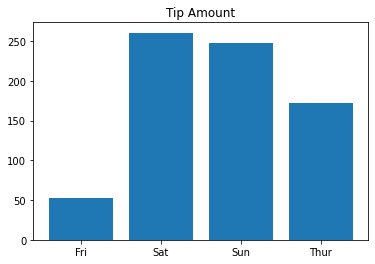

In [36]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt

# 막대 그래프 시각화 # X축, Y축
plt.bar(x = tip_sum['day'], height = tip_sum['tip'])
#plt.barh(tip_sum['day'], tip_sum['tip']) barh 가로 막대
plt.title('Tip Amount')
plt.show()


- plt.bar() 대신 plt.barh() 함수를 사용해 가로 막대그래프를 표시할 수 있습니다.

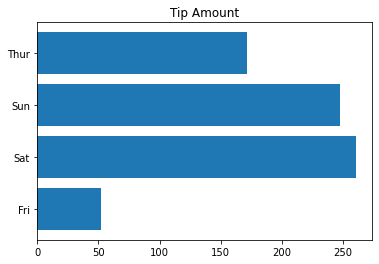

In [38]:
# 가로 막대 그래프 시각화
plt.barh(y = tip_sum['day'], width = tip_sum['tip']) #barh 가로 막대
plt.title('Tip Amount')
plt.show()



**4) 참고: 선 그래프**

- 연속형 값의 변화 추이를 볼 때 선 그래프가 유용합니다.

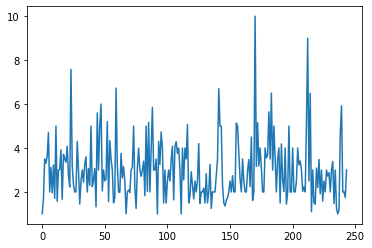

In [10]:
# 선 그래프 시각화: tip
plt.plot(tip['tip'])
plt.show()


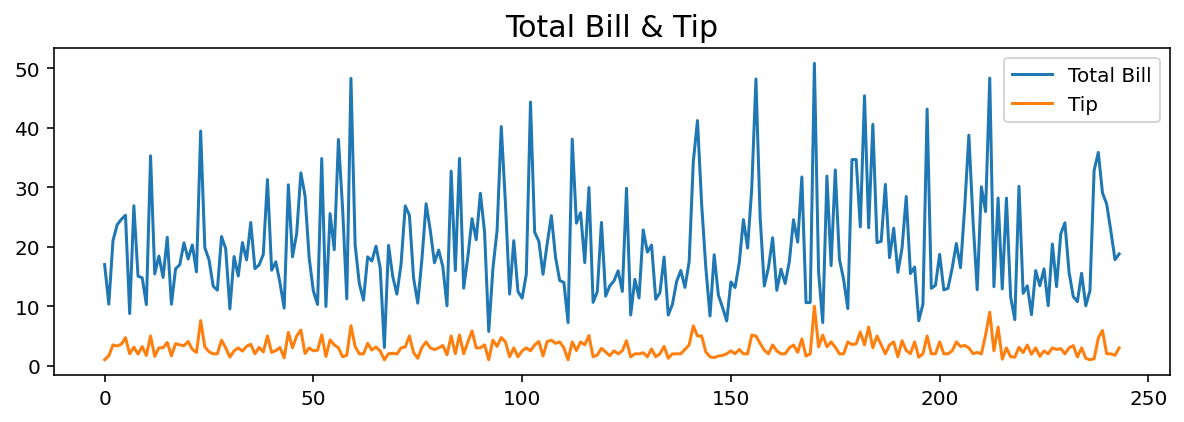

In [54]:
# 선 그래프 시각화: total_bill
%config InlineBackend.figure_format = 'retina'  #시각화시 플롯이나 글씨 선명하게 해줌
plt.figure(figsize = (10, 3))
plt.plot( tip[    ['total_bill', 'tip'] ])
plt.title('Total Bill & Tip', size = 15)
plt.legend( ['Total Bill', 'Tip'])
plt.show()


In [12]:
tip_summ = tip.groupby(by = 'day', as_index = False)[ ['tip','total_bill'] ].sum()
tip_summ

,day,tip,total_bill
0,Fri,51.96,325.88
1,Sat,260.40,1778.40
2,Sun,247.39,1627.16
3,Thur,171.83,1096.33


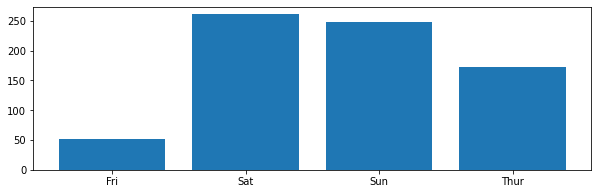

In [19]:
plt.figure(figsize = (10,3))
plt.bar(tip_summ['day'], tip_summ['tip'])
plt.show()

### 4.1.2.여러 열 집계

- 여러 열에 대한 집계를 같이 할 수 있습니다.
- **[ ['total_bill', 'tip'] ].sum()** 형태와 같이 집계 대상 열을 리스트로 지정합니다.

In [20]:
# day별 total_bill, tip 합계 조회
tip_summ = tip.groupby(by = 'day', as_index =False)[  ['total_bill','tip']  ].sum()

#내림차순 정렬
tip_summ = tip_summ.sort_values(by = 'total_bill', ascending= False ) #다른 변수에 받던지,inplace = True

#확인 
tip_summ

,day,total_bill,tip
1,Sat,1778.40,260.40
2,Sun,1627.16,247.39
3,Thur,1096.33,171.83
0,Fri,325.88,51.96


- sum() 메소드 앞에 아무 열도 지정하지 않으면 **기준열 이외의 모든 숫자 열에 대한 집계**가 수행됩니다.

In [21]:
# day별 나머지 열들 합계 조회
tip_sum = tip.groupby(by = 'day', as_index = False).sum()  #필요업는 size 까지 집계

# 확인
tip_sum

,day,total_bill,tip,size
0,Fri,325.88,51.96,40
1,Sat,1778.40,260.40,219
2,Sun,1627.16,247.39,216
3,Thur,1096.33,171.83,152


- **by=['day', 'smoker']** 과 같이 집계 기준 열을 여럿 설정할 수도 있습니다.

In [78]:
# day + smoker별 나머지 열들 합계 조회
tip_sum = tip.groupby(by = ['day','sex'], as_index = False)[ ['tip','total_bill'] ].sum()

# 확인해보자  목금토일로 정렬하는 방법!!! 
tip_sum.sort_values(by = 'day',ascending= True) #틀린듯

,day,sex,tip,total_bill
0,Fri,Female,25.03,127.31
1,Fri,Male,26.93,198.57
2,Sat,Female,78.45,551.05
3,Sat,Male,181.95,1227.35
4,Sun,Female,60.61,357.70
5,Sun,Male,186.78,1269.46
6,Thur,Female,82.42,534.89
7,Thur,Male,89.41,561.44


## 4.2.평균, 최댓값, 최솟값, 개수 구하기

- 위와 동일한 방법으로 평균, 최댓값, 최솟값, 개수를 집계할 수 있습니다.
- sum() 메소드 대신 관련된 메소드만 적절히 지정하면 됩니다. 

**1) 평균 구하기**

In [ ]:
# day별 tip 평균
tip_mean = 

# 확인
tip_mean

In [ ]:
# day + sex 별 나머지 모든 열 평균
tip_mean = 

# 확인
tip_mean

**2) 최댓값, 최솟값, 개수 구하기**


In [ ]:
# day별 tip 최댓값
tip_max = 

# 확인
tip_max

In [ ]:
# day별 tip 최솟값
tip_min =

# 확인
tip_min